#### 7PAM2000 Applied Data Science 2 Assignment 2

**Praveen Kumar Reddy Kondampalli, 21032370**

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing World Bank data on climate change using WBGAPI

In [48]:
import wbgapi as wb         #importing wbgapi as wb 

#Run pip install wbgapi to install this API.

In [49]:
# 'EN.ATM.GHGT.KT.CE' is the indicator ID for Total greenhouse gas emissions (kt of CO2 equivalent).

greenhouse_emission_ind = 'EN.ATM.GHGT.KT.CE' #assigning the ID to a variable

In [50]:
def wb_data(indicator_id):
    """
   This function downloads data for the given indicator from the World Bank website and stores it as a dataframe in World Bank data format and its transposed format.
The years range from 1950 to 2021, with a 5-year increase in between.
As a string, the argument is the indication ID. 
    """
    
    df = wb.data.DataFrame(indicator_id, time=range(1950, 2021, 5))
    
    df.index.name = 'Country'
    df.columns.name = 'Year'
    df.columns = df.columns.str.replace("YR","")
    
    return(df, df.T)

In [51]:
df_CO2 = wb_data(greenhouse_emission_ind)

In [52]:
df_CO2[0].head(5) # The World Bank format's first dataframe

Year,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFE,NaN,NaN,NaN,NaN,NaN,NaN,838050.0,895540.0,948360.0,1154760.0,1335490.0,1436770.0,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,15180.0,13480.0,15080.0,17400.0,44910.0,93730.0,NaN
AFW,NaN,NaN,NaN,NaN,NaN,NaN,398170.0,526710.0,553740.0,650720.0,690440.0,805370.0,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,42180.0,48460.0,49590.0,67230.0,84120.0,90620.0,NaN


In [53]:
df_CO2[1].head(5) # The second dataframe has columns for countries.

Country,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# We need to reset the index with real nation names because the country codes in the dataframes don't make sense.

# The country names are listed below, along with their respective codes.

url = 'https://docs.google.com/spreadsheets/d/1-HxLssAd2glfU40FWuccMw8758zrJyon6H6qkMjLeZU/edit#gid=0'

url_readable = url.replace('/edit#gid=', '/export?format=csv&gid=')

country_names = pd.read_csv(url_readable)

country_names

,Country Name,Country Code
0,Aruba,ABW
1,Africa Eastern and Southern,AFE
2,Afghanistan,AFG
3,Africa Western and Central,AFW
4,Angola,AGO
...,...,...
261,Kosovo,XKX
262,"Yemen, Rep.",YEM
263,South Africa,ZAF
264,Zambia,ZMB


In [55]:
def country_code_to_name(df):
    """
    Takes a dataframe with a country code index and replaces it with country names.
    """
    df.index = country_names['Country Name']
    
    return(df)

In [56]:
country_code_to_name(df_CO2[0])

df_CO2[0].head(5)

Year,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country Name,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,838050.0,895540.0,948360.0,1154760.0,1335490.0,1436770.0,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,15180.0,13480.0,15080.0,17400.0,44910.0,93730.0,NaN
Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,398170.0,526710.0,553740.0,650720.0,690440.0,805370.0,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,42180.0,48460.0,49590.0,67230.0,84120.0,90620.0,NaN


In [57]:
df_CO2[1].columns = country_names['Country Name']
df_CO2[1].head(5)

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
countries_of_interest = ['Pakistan', 'Ukraine', 'Canada', 'China', 'Ecuador', 'France', 'India', 
                         'Kenya', 'Russia', 'South Africa', 'Sweden', 'United Kingdom', 'United States']

In [59]:
# China, United States, India, Russia and Ukraine are the most CO2 producing countries from the list.

In [60]:
# Constructing a dataframe with climate change indicators of interest for the listed countries.

rural_pop = 'SP.RUR.TOTL.ZS'          # Rural population (% of total population)

urban_pop = 'SP.URB.TOTL.IN.ZS'       # Urban population (% of total population)

forest_area = 'AG.LND.FRST.ZS'        # Forest area (% of land area)

arable_land = 'AG.LND.ARBL.ZS'        # Arable land (% of land area)

manufacturing = 'NV.IND.MANF.ZS'      # Manufacturing, value added (% of GDP)

gdp = 'NY.GDP.MKTP.CD'                # GDP (current USD)  


In [61]:
df_r = wb_data(rural_pop)

country_code_to_name(df_r[0])

df_rural = df_r[0].loc[countries_of_interest]

df_rural.head()

Year,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country Name,,,,,,,,,,,,,
Pakistan,77.896,76.489,75.183,73.659,71.934,70.656,69.424,68.164,67.018,66.018,65.003,63.974,62.835
Ukraine,53.208,49.351,45.169,41.611,38.307,35.319,33.243,33.049,32.855,32.210,31.404,30.939,30.392
Canada,30.939,27.108,24.346,24.389,24.337,23.646,23.418,22.325,20.522,19.878,19.063,18.741,18.438
China,83.797,81.914,82.600,82.600,80.642,77.126,73.558,69.039,64.123,57.478,50.774,44.500,38.572
Ecuador,66.122,63.360,60.722,57.637,53.039,48.785,44.910,42.234,39.701,38.289,37.310,36.602,35.834


In [62]:
df_u = wb_data(urban_pop)

country_code_to_name(df_u[0])

df_urban = df_u[0].loc[countries_of_interest]

df_urban.to_csv('urban.csv')

df_urban

Year,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country Name,,,,,,,,,,,,,
Pakistan,22.104,23.511,24.817,26.341,28.066,29.344,30.576,31.836,32.982,33.982,34.997,36.026,37.165
Ukraine,46.792,50.649,54.831,58.389,61.693,64.681,66.757,66.951,67.145,67.790,68.596,69.061,69.608
Canada,69.061,72.892,75.654,75.611,75.663,76.354,76.582,77.675,79.478,80.122,80.937,81.259,81.562
China,16.203,18.086,17.400,17.400,19.358,22.874,26.442,30.961,35.877,42.522,49.226,55.500,61.428
Ecuador,33.878,36.640,39.278,42.363,46.961,51.215,55.090,57.766,60.299,61.711,62.690,63.398,64.166
France,61.880,67.071,71.055,72.926,73.282,73.650,74.056,74.912,75.871,77.130,78.369,79.655,80.975
India,17.924,18.785,19.760,21.332,23.098,24.348,25.547,26.607,27.667,29.235,30.930,32.777,34.926
Kenya,7.362,8.605,10.295,12.914,15.583,16.079,16.748,18.263,19.892,21.675,23.571,25.658,27.995
Russia,53.731,58.173,62.471,66.427,69.751,71.923,73.394,73.372,73.350,73.463,73.687,74.050,74.754


In [63]:
df_f = wb_data(forest_area)

country_code_to_name(df_f[0])

df_forest = df_f[0].loc[countries_of_interest]

df_forest.drop(['1960','1965','1970','1975','1980','1985'], axis=1).head(5) # removed the years without proper data

Year,1990,1995,2000,2005,2010,2015,2020
Country Name,,,,,,,
Pakistan,0.187759,6.160524,5.852091,5.581277,5.310463,5.101443,4.833307
Ukraine,16.007595,16.211271,16.414948,16.446892,16.481392,16.670407,16.724197
Canada,38.845512,38.819247,38.792982,38.766226,38.739471,38.716438,38.695513
China,16.673325,17.726847,18.780497,20.033048,21.285597,22.313094,23.340596
Ecuador,52.854392,51.225816,55.284667,53.870772,52.456877,51.615316,50.321429


In [64]:
df_a = wb_data(arable_land)

country_code_to_name(df_a[0])

df_arable = df_a[0].loc[countries_of_interest]

df_arable.drop(['1960'], axis=1).head()

Year,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country Name,,,,,,,,,,,,
Pakistan,41.614778,39.824616,39.954338,41.653694,41.134807,38.592258,39.513284,40.265670,39.137090,38.125259,39.435450,NaN
Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,57.454043,56.207819,56.011599,56.060554,56.577880,NaN
Canada,4.228389,4.294419,4.356211,4.494517,4.615201,4.613974,4.585309,4.569805,4.418672,4.203516,4.269881,NaN
China,10.871221,10.617526,10.375514,10.286715,12.821139,13.207996,12.757302,12.697062,12.866959,12.877841,12.689357,NaN
Ecuador,6.194914,6.231036,6.212975,5.570004,5.743390,5.793960,5.685595,6.506684,5.218232,4.776937,4.300209,NaN


In [65]:
df_m = wb_data(manufacturing)

country_code_to_name(df_m[0])

df_manufacturing = df_m[0].loc[countries_of_interest]

df_manufacturing.head()

Year,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country Name,,,,,,,,,,,,,
Pakistan,11.302789,13.338056,14.586082,14.292653,14.219892,14.316424,15.460025,14.617814,10.219793,12.696174,13.074861,12.792089,11.465737
Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.950362,17.387355,18.508282,13.095749,11.902779,10.100566
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.024437,13.374762,10.027154,9.975423,NaN
China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.093924,31.612822,28.951671,26.175907
Ecuador,19.712241,20.402875,23.191066,18.842139,18.339520,21.616179,22.330935,22.164570,22.379389,14.128212,13.401890,14.423508,15.570442


In [66]:
df_g = wb_data(gdp)

country_code_to_name(df_g[0])

df_gdp = df_g[0].loc[countries_of_interest]

df_gdp.drop(['1960','1965','1970','1975','1980','1985', '2020'], axis=1).head()

Year,1990,1995,2000,2005,2010,2015
Country Name,,,,,,
Pakistan,4.001042e+10,6.063602e+10,8.201774e+10,1.200553e+11,1.771656e+11,2.705561e+11
Ukraine,8.139354e+10,4.821387e+10,3.237508e+10,8.923937e+10,1.412099e+11,9.103096e+10
Canada,5.939296e+11,6.040316e+11,7.447734e+11,1.173109e+12,1.617343e+12,1.556509e+12
China,3.608579e+11,7.345479e+11,1.211347e+12,2.285966e+12,6.087164e+12,1.106155e+13
Ecuador,1.523928e+10,2.443288e+10,1.832776e+10,4.150708e+10,6.955537e+10,9.929038e+10


In [67]:
df_gr = wb_data(greenhouse_emission_ind)

country_code_to_name(df_gr[0])

df_greenhouse = df_gr[0].loc[countries_of_interest]

df_greenhouse

Year,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country Name,,,,,,,,,,,,,
Pakistan,NaN,NaN,NaN,NaN,NaN,NaN,158450.0,195560.0,228010.0,270700.0,314470.0,365780.0,NaN
Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,922420.0,569420.0,433670.0,412020.0,369850.0,279070.0,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,559840.0,605760.0,671760.0,705080.0,674200.0,707930.0,NaN
China,NaN,NaN,NaN,NaN,NaN,NaN,3222270.0,4266840.0,4597430.0,7194480.0,10203820.0,11859290.0,NaN
Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,33820.0,41420.0,42360.0,51790.0,61800.0,66420.0,NaN
France,NaN,NaN,NaN,NaN,NaN,NaN,502750.0,497010.0,508560.0,509070.0,470790.0,430140.0,NaN
India,NaN,NaN,NaN,NaN,NaN,NaN,1226440.0,1457390.0,1717560.0,1969680.0,2564130.0,3063650.0,NaN
Kenya,NaN,NaN,NaN,NaN,NaN,NaN,38490.0,37650.0,39680.0,44060.0,64700.0,73990.0,NaN
Russia,NaN,NaN,NaN,NaN,NaN,NaN,3251770.0,2298150.0,2194340.0,2373120.0,2454000.0,2475690.0,NaN


In [68]:
#corr_pearson = df.corr(method='pearson')
#corr_pearson

In [69]:
tot_emission = df_CO2[0].loc[countries_of_interest].drop(['1960','1965','1970','1975','1980','1985','2020'], axis=1)

In [70]:
tot_gdp = df_gdp.drop(['1960','1965','1970','1975','1980','1985', '2020'], axis=1)

In [71]:
C = tot_emission*1000*1000 / tot_gdp
C

Year,1990,1995,2000,2005,2010,2015
Country Name,,,,,,
Pakistan,3.960218,3.225146,2.780008,2.254794,1.775006,1.351956
Ukraine,11.332841,11.810295,13.395178,4.617020,2.619151,3.065660
Canada,0.942603,1.002861,0.901966,0.601036,0.416856,0.454819
China,8.929470,5.808798,3.795304,3.147239,1.676285,1.072118
Ecuador,2.219265,1.695256,2.311247,1.247739,0.888501,0.668947
France,0.396122,0.310419,0.372397,0.231717,0.177980,0.176346
India,3.820935,4.045137,3.666906,2.400931,1.530262,1.456393
Kenya,4.490013,4.161911,3.123092,2.351384,1.424935,1.055185
Russia,6.291951,5.810200,8.449189,3.106108,1.609267,1.815713


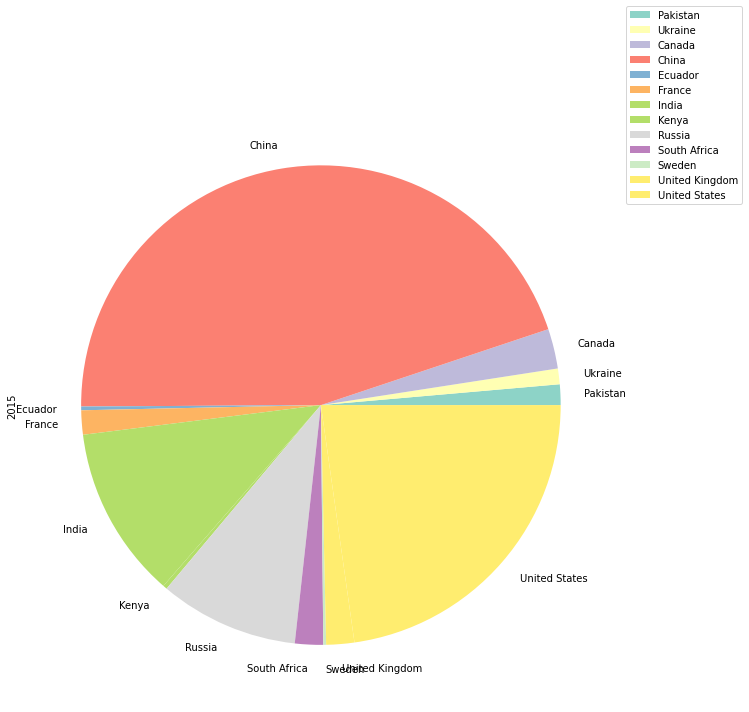

In [72]:
# Creating a pie-chart for 2015 emissions data  
df_greenhouse.plot.pie(y='2015', figsize=(14, 10), cmap='Set3')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()

<AxesSubplot:title={'center':'GDP (USD)'}, xlabel='Country Name', ylabel='GDP (USD)'>

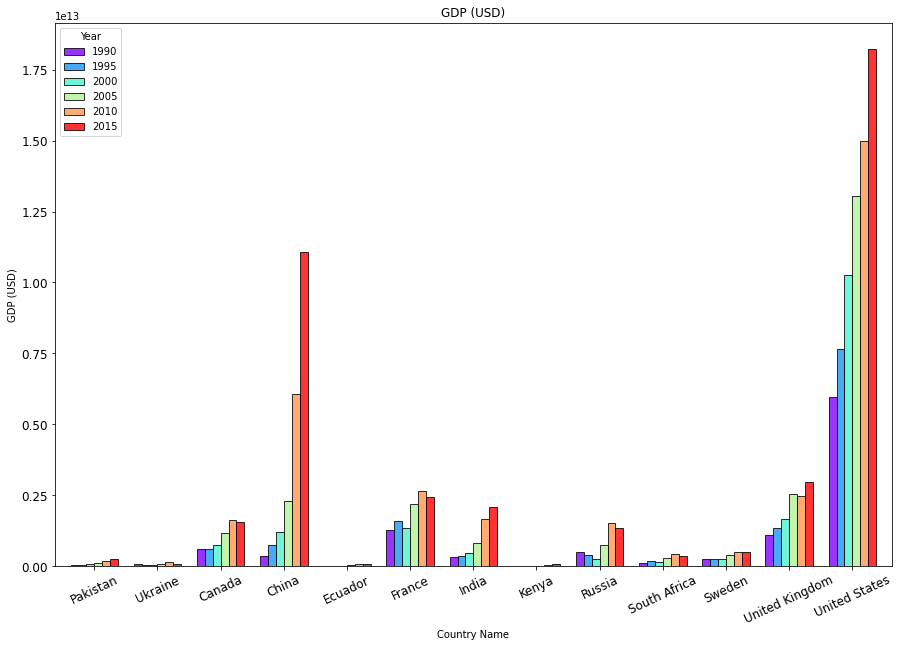

In [73]:
tot_gdp.plot(kind='bar', figsize=(15,10), xlabel='Country Name', ylabel='GDP (USD)', fontsize=12, alpha=0.8, 
             stacked=False, width = 0.75, title='GDP (USD)', colormap='rainbow', edgecolor='black', rot=25)

<AxesSubplot:title={'center':'Greenhouse gas emission by countries'}, xlabel='Country Name', ylabel='KT of CO2 equivalent'>

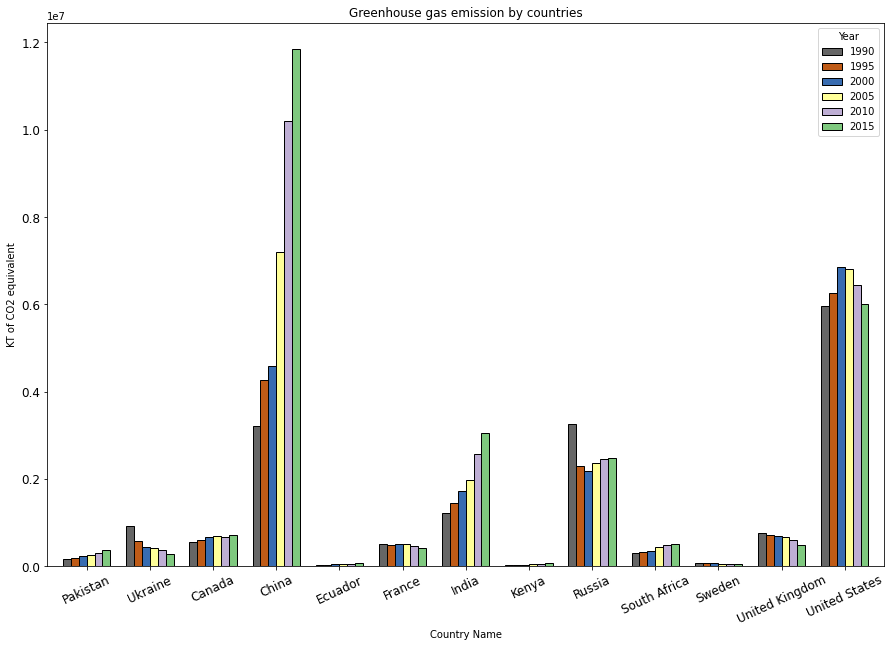

In [74]:
tot_emission.plot(kind='bar', figsize=(15,10), xlabel='Country Name', ylabel='KT of CO2 equivalent', fontsize=12, alpha=1.0, 
                                stacked=False, width = 0.75, title='Greenhouse gas emission by countries', 
                                colormap='Accent_r', edgecolor='black', rot=25)

In [75]:
#plt.scatter(df_urban.drop('World'), df_forest.drop('World'))

In [76]:
tot_emission.corrwith(tot_gdp, axis=1)

Country Name
Pakistan          0.974712
Ukraine          -0.222468
Canada            0.753919
China             0.949859
Ecuador           0.960546
France           -0.669921
India             0.983036
Kenya             0.991306
Russia           -0.008818
South Africa      0.974697
Sweden           -0.889807
United Kingdom   -0.886152
United States     0.056652
dtype: float64

In [92]:
# Overall greenhouse gas emissions in France, Russia, Sweden, and the United Kingdom have negative associations with total GDP.
# There is no link between the two elements in the United States.
# The remaining countries on the list have significant relationships.

In [78]:
df_urban.corrwith(df_forest, axis=1)

Country Name
Pakistan          0.452850
Ukraine           0.910318
Canada           -0.969458
China             0.998542
Ecuador          -0.242460
France            0.996876
India             0.974893
Kenya            -0.852139
Russia            0.772324
South Africa     -0.999853
Sweden            0.720512
United Kingdom    0.949806
United States     0.917218
dtype: float64

In [79]:
import scipy.stats as stats
(stats.describe(df_urban.T).mean)

stats.describe(df_urban.T)

DescribeResult(nobs=13, minmax=(array([22.104, 46.792, 69.061, 16.203, 33.878, 61.88 , 17.924,  7.362,
       53.731, 46.619, 72.49 , 77.117, 69.996]), array([37.165, 69.608, 81.562, 61.428, 64.166, 80.975, 34.926, 27.995,
       74.754, 67.354, 87.977, 83.903, 82.664])), mean=array([30.13438462, 62.53407692, 77.14230769, 31.79053846, 51.95807692,
       73.91015385, 25.61046154, 17.28      , 69.11892308, 54.22553846,
       82.64246154, 79.29430769, 76.46238462]), variance=array([ 24.14273826,  57.20995308,  13.04622073, 248.72541994,
       120.26802274,  26.59293814,  29.2423156 ,  41.48028433,
        47.19833408,  52.59532694,  16.09899244,   4.2582099 ,
        16.25669659]), skewness=array([-0.19787576, -0.97003206, -0.67230484,  0.68235762, -0.41197138,
       -0.89348068,  0.1731919 ,  0.0362538 , -1.21419859,  0.57782546,
       -1.32932763,  1.1940798 ,  0.10293827]), kurtosis=array([-1.20196624, -0.44073076, -0.03400527, -0.9502639 , -1.34858747,
        0.48500615, -1.0605

In [80]:
df_urban.mean(axis=1)

Country Name
Pakistan          30.134385
Ukraine           62.534077
Canada            77.142308
China             31.790538
Ecuador           51.958077
France            73.910154
India             25.610462
Kenya             17.280000
Russia            69.118923
South Africa      54.225538
Sweden            82.642462
United Kingdom    79.294308
United States     76.462385
dtype: float64

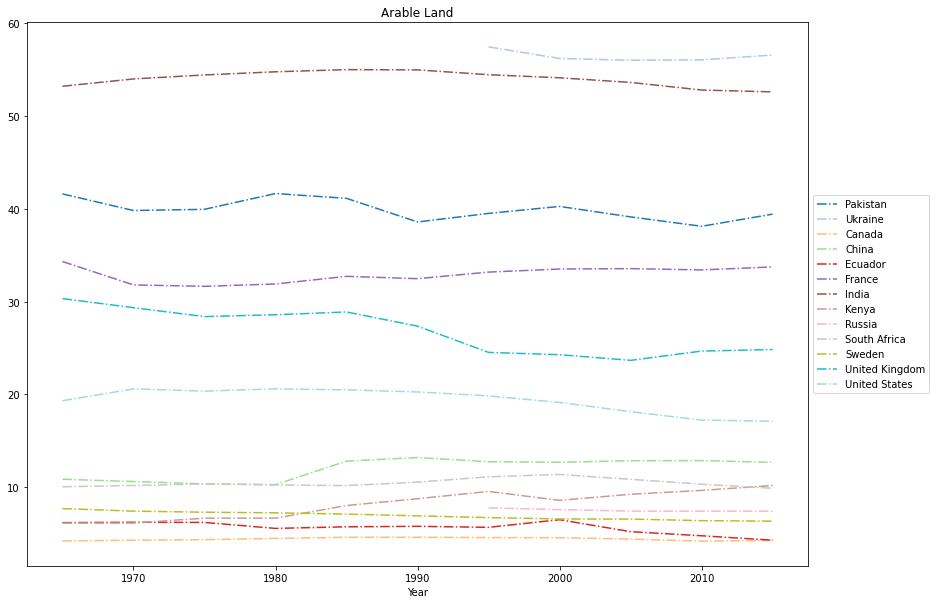

In [81]:
df_arable.T.reset_index().plot('Year', countries_of_interest[:], linestyle ='-.', figsize=(14,10), 
                               title='Arable Land', cmap='tab20')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [82]:
df_forest.T.iloc[:, :]

Country Name,Pakistan,Ukraine,Canada,China,Ecuador,France,India,Kenya,Russia,South Africa,Sweden,United Kingdom,United States
Year,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,0.187759,16.007595,38.845512,16.673325,52.854392,26.363945,21.504848,6.779597,49.356465,14.955271,68.389628,11.482660,33.022308
1995,6.160524,16.211271,38.819247,17.726847,51.225816,27.141934,22.119172,6.869777,49.401052,14.805241,68.511478,11.846402,33.081594
2000,5.852091,16.414948,38.792982,18.780497,55.284667,27.919871,22.733495,6.959957,49.401850,14.655211,68.633328,12.210143,33.130174


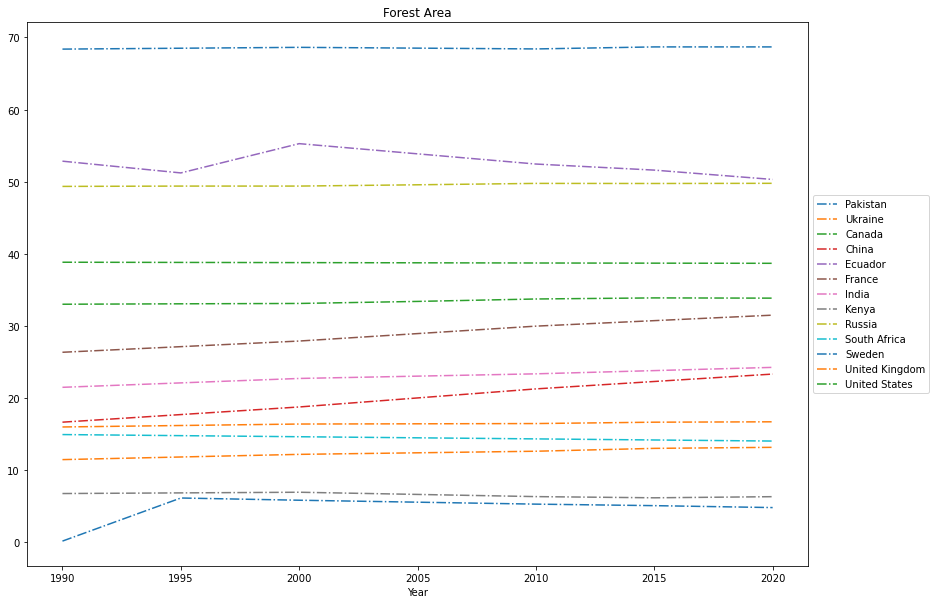

In [83]:
df_forest.T.reset_index().plot('Year', countries_of_interest, linestyle ='-.', figsize=(14,10), title='Forest Area')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [84]:
# Except for Ukraine and Kenya, the forest acreage in most countries has remained relatively constant over time.
# Forests cover only roughly 14% of Pakistan's and the United Kingdom's total land area.

In [85]:
df_urban.max(axis=1)

Country Name
Pakistan          37.165
Ukraine           69.608
Canada            81.562
China             61.428
Ecuador           64.166
France            80.975
India             34.926
Kenya             27.995
Russia            74.754
South Africa      67.354
Sweden            87.977
United Kingdom    83.903
United States     82.664
dtype: float64

In [86]:
from sklearn.preprocessing import StandardScaler

df_urban_norm = StandardScaler().fit_transform(df_urban)

(array([[1., 0., 3., 0., 1., 2., 1., 1., 2., 2.],
        [1., 0., 3., 0., 1., 1., 1., 1., 3., 2.],
        [1., 1., 2., 0., 1., 1., 1., 1., 3., 2.],
        [0., 2., 2., 0., 1., 1., 1., 1., 4., 1.],
        [0., 3., 1., 0., 1., 1., 1., 1., 4., 1.],
        [1., 2., 1., 0., 0., 2., 0., 2., 4., 1.],
        [1., 2., 1., 0., 0., 2., 0., 1., 5., 1.],
        [1., 1., 2., 0., 0., 2., 0., 2., 4., 1.],
        [1., 1., 2., 0., 0., 2., 1., 1., 4., 1.],
        [1., 2., 0., 1., 0., 2., 1., 1., 4., 1.],
        [1., 2., 0., 1., 0., 2., 1., 1., 4., 1.],
        [1., 2., 0., 0., 1., 2., 1., 1., 4., 1.],
        [1., 2., 0., 0., 0., 2., 2., 1., 4., 1.]]),
 array([-1.94283555, -1.60884781, -1.27486006, -0.94087232, -0.60688457,
        -0.27289683,  0.06109092,  0.39507866,  0.72906641,  1.06305415,
         1.3970419 ]),
 <a list of 13 BarContainer objects>)

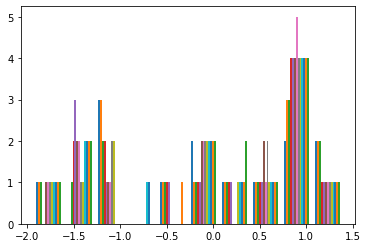

In [87]:
plt.hist(df_urban_norm)

In [88]:
def df_country_specific(country, colormap):
    """
    The function accepts a country name from the countries of interest list and returns a heatmap of the variables/features within that nation. 
    """
    
    x1 = df_rural.loc[country].reset_index().iloc[:, 1]
    x2 = df_urban.loc[country].reset_index().iloc[:, 1]
    x3 = df_forest.loc[country].reset_index().iloc[:, 1]
    x4 = df_arable.loc[country].reset_index().iloc[:, 1]
    x5 = df_manufacturing.loc[country].reset_index().iloc[:, 1]
    x6 = df_gdp.loc[country].reset_index().iloc[:, 1]
    x7 = df_greenhouse.loc[country].reset_index().iloc[:, 1]
    
    df_country = pd.DataFrame([x1, x2, x3, x4, x5, x6, x7])
    df_country.index = ['Rural population (% of total)', 'Urban population (% of total)', 'Forest area', 'Arable land', 
                        'Manufacturing revenue', 'GDP', 'Greenhouse emission']
    df_country.columns = ['1960','1965', '1970', '1975', '1980','1985', '1990', '1995','2000', '2005', '2010', '2015', '2020'] 
    
    plt.figure(figsize=(14,10))
    
    sns.heatmap(df_country.T.corr(), annot=True, cmap=colormap, alpha=0.9, linecolor='black', linewidths = 0.05)
    
    plt.suptitle(country, x=0.45, y=0.95)
    
    plt.show()
    
    return ()

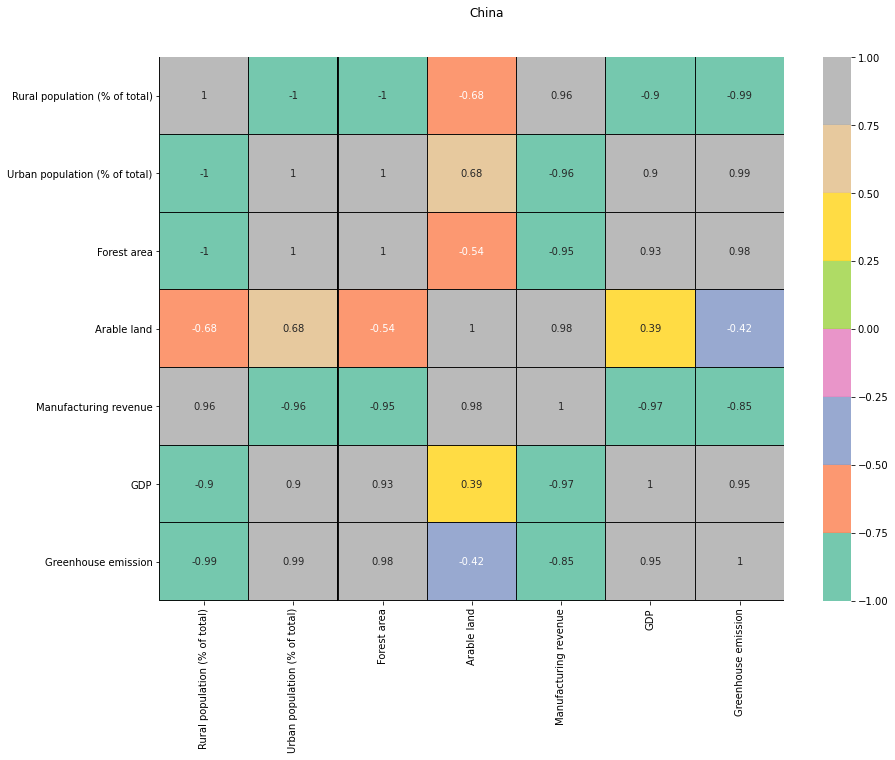

In [89]:
df_china = df_country_specific('China', 'Set2')

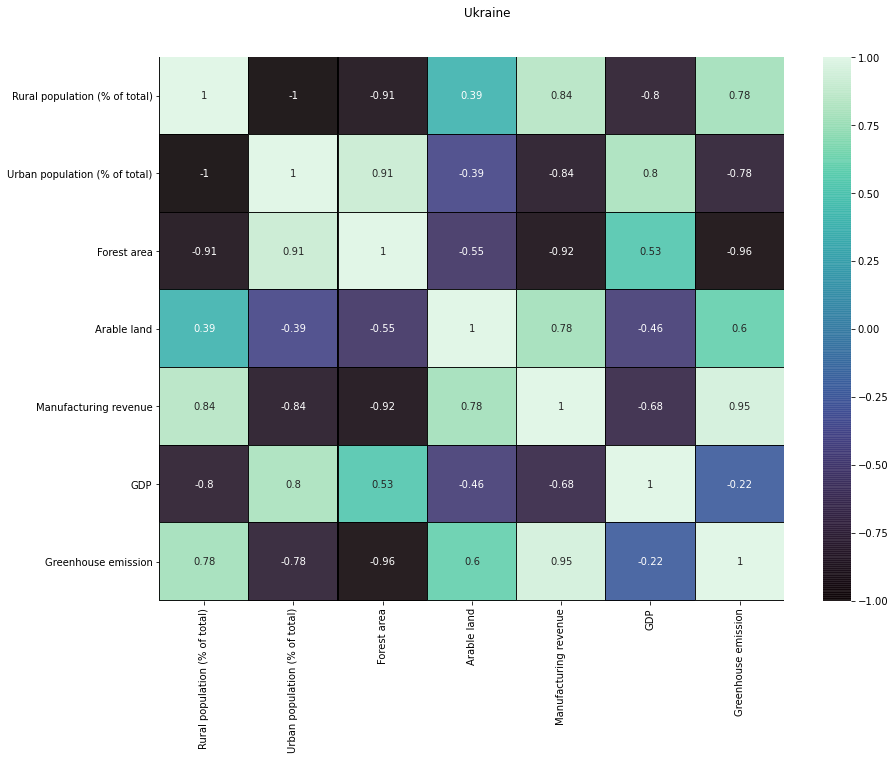

()

In [90]:
df_country_specific('Ukraine', 'mako')

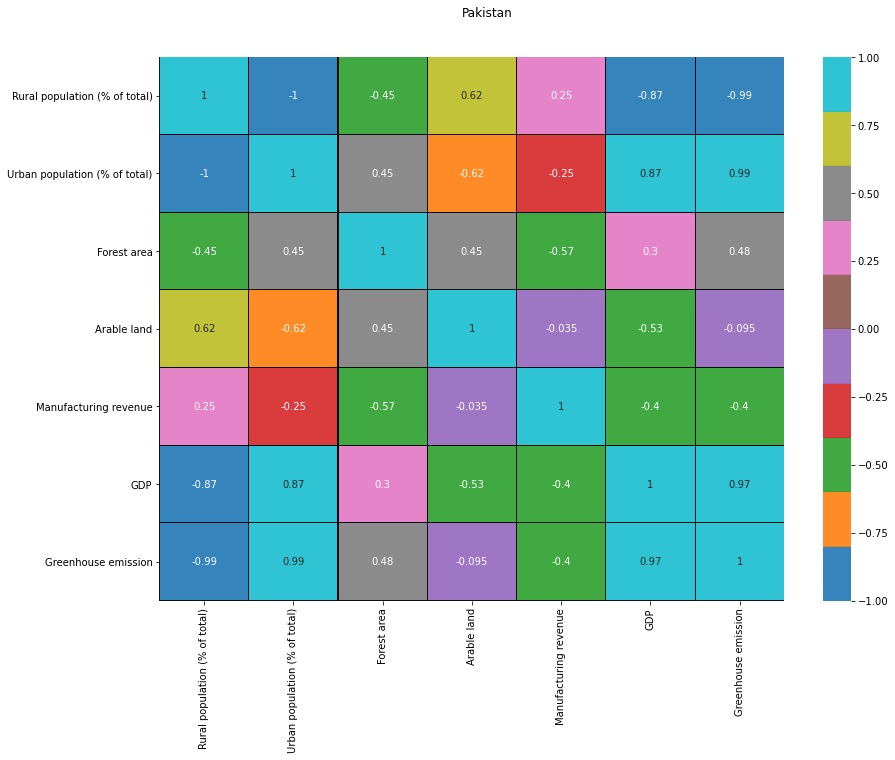

In [91]:
df_Pakistan = df_country_specific('Pakistan', 'tab10')